# Python Project 2 : Data Wrangling
## Table of Contents
<ul>
<li><a href="#gather">Gathering</a></li>
<li><a href="#assess">Assessing</a></li>
<li><a href="#clean">Cleaning</a></li>
    <li><a href="#analyze">Analyze</a>    
</ul>

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
from functools import reduce
from io import StringIO
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='gather'></a>
# Gathering The datasets
Gathering  three different datasets using different methods including request , IO  and Tweetpy as well as json

### First dataset

In [3]:
# Gather arhcive twitter data
df_twitter = pd.read_csv(r'C:\Users\ADMIN\Desktop\data wrangling\Project 2\twitter-archive-enhanced.csv')
df_twitter.head(5)




tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [4]:
df_twitter.shape

(2356, 17)

### Second Dataset

In [5]:
#Gather image data from link using request libray
image_link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_load = requests.get(image_link)

In [6]:
#View the image_load status
image_load

<Response [200]>

In [7]:
#  make image_load to  encoded utf-8 string as standard practice
images = str(image_load.content, 'UTF-8')
image_str = StringIO(images)

In [8]:
#Load image dataset
df_images = pd.read_csv(image_str ,sep = '\t')

In [9]:
#Checking column names
df_images.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [10]:
#Check numbe of columns
df_images.shape

(2075, 12)

### Third Dataset

In [11]:
#loading the json file and reading each line
df_api = []
with open('tweet_json.txt') as jsfile:
    for line in jsfile:
        tweet = (json.loads(line))
        tweet_id  = tweet['id']
        retweet_count = tweet['retweet_count']
        favourite_count = tweet['favorite_count']
        df_api.append({'tweet_id': tweet_id,
                       'favorite_count': favourite_count,
                       'retweet_count': retweet_count })

In [12]:
# Putting the list into a dataframe
retweet_data =  pd.DataFrame(df_api , columns = ['tweet_id' , 'retweet_count','favorite_count'])

In [13]:
#Checking columns and rows
retweet_data.shape

(2354, 3)

In [14]:
#Checking column names
retweet_data.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

<a id='assess'></a>
# Assessing

During this stage we will be addresing two things 
<ul>
<li>** Quality Issues - The problem with the content of the data</li>     
<li>**  Tideness Issues - Which focus on the structural side of the data<li></ul>
 
 #### 1st dataset = df_twitter
 ####  2nd dataset = df_images
 ####  3rd dataset = tweet_data
 
 ##### Quality isssues
 <ol>
    <li>The a and non descriptive tag in the source column and unclear defined values</li>
  <li>Dropping the retweets column and replies column[(in_reply_to_status_id),	(in_reply_to_user_id)(tweet_id	in_reply_to_status_id)(in_reply_to_user_id)	(timestamp)] of the first dataset</li>
    <li>timestap datatype is an Object in the first dataset </li>
    <li>the tweet_id column is int instead of string in all datasets</li>
    <li>change the dtypes to Categorize for the dog stagges puppo ,doggo fluppo etc  </li>
    <li>names of dogs like none </li>
    <li>The names of dogs such'a', 'an' and 'the should be replaced</li>
    <li> retweets are not necessary for analysis from dataset</li>
</ol>

In [15]:
#Asssessing first dataset
df_twitter.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [16]:
#Sample 5 different rows
df_twitter.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2335  666287406224695296                    NaN                  NaN   
1305  707387676719185920                    NaN                  NaN   
1028  745789745784041472                    NaN                  NaN   
558   803321560782307329                    NaN                  NaN   
185   856330835276025856                    NaN                  NaN   

                      timestamp  \
2335  2015-11-16 16:11:11 +0000   
1305  2016-03-09 02:08:59 +0000   
1028  2016-06-23 01:25:06 +0000   
558   2016-11-28 19:35:59 +0000   
185   2017-04-24 02:15:55 +0000   

                                                 source  \
2335  <a href="http://twitter.com/download/iphone" r...   
1305  <a href="http://twitter.com/download/iphone" r...   
1028  <a href="http://twitter.com/download/iphone" r...   
558   <a href="http://twitter.com/download/iphone" r...   
185   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2335  This is an Albanian 3 1/2 legged  Episcopalian...                  NaN   
1305  Meet Clarkus. He's a Skinny Eastern Worcesters...                  NaN   
1028  This is Gus. He didn't win the Powerball. Quit...                  NaN   
558   RT @dog_rates: This is Philbert. His toilet br...         7.677549e+17   
185   RT @Jenna_Marbles: @dog_rates Thanks for ratin...         8.563302e+17   

      retweeted_status_user_id retweeted_status_timestamp  \
2335                       NaN                        NaN   
1305                       NaN                        NaN   
1028                       NaN                        NaN   
558               4.196984e+09  2016-08-22 16:06:54 +0000   
185               6.669901e+07  2017-04-24 02:13:14 +0000   

                                          expanded_urls  rating_numerator  \
2335  https://twitter.com/dog_rates/status/666287406...                 1   
1305  https://twitter.com/dog_rates/status/707387676...                10   
1028  https://twitter.com/dog_rates/status/745789745...                10   
558   https://twitter.com/dog_rates/status/767754930...                11   
185                                                 NaN                14   

      rating_denominator      name doggo floofer pupper puppo  
2335                   2        an  None    None   None  None  
1305                  10   Clarkus  None    None   None  None  
1028                  10       Gus  None    None   None  None  
558                   10  Philbert  None    None   None  None  
185                   10      None  None    None   None  None

In [17]:
#assesing the source column
df_twitter.source.value_counts().sum()

2356

In [18]:
#checking datatypes
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
#function for calculating the number and percentage of number of nulls for a column
def checknumofnulls(column , string):
    numofnulls = column.isna().sum()
    totalnumofvalues = column.value_counts().sum()
    percentage = numofnulls/totalnumofvalues*100
    string_text = string
    if percentage == 0:
        print("No null value in"+column) 
    return string_text , numofnulls , percentage.round() 

In [20]:
#checking nulls in expanded urls column
checknumofnulls(df_twitter.expanded_urls , f"the number of nulls and their percentage in {df_twitter.columns[5]} is")

('the number of nulls and their percentage in text is', 59, 3.0)

In [21]:
#checking nulls in text column
checknumofnulls(df_twitter.text , f"the number of nulls and their percentage in {df_twitter.columns[9]} is")

0       No null value inThis is Phineas. He's a mystic...
1       No null value inThis is Tilly. She's just chec...
2       No null value inThis is Archie. He is a rare N...
3       No null value inThis is Darla. She commenced a...
4       No null value inThis is Franklin. He would lik...
                              ...                        
2351    No null value inHere we have a 1949 1st genera...
2352    No null value inThis is a purebred Piers Morga...
2353    No null value inHere is a very happy pup. Big ...
2354    No null value inThis is a western brown Mitsub...
2355    No null value inHere we have a Japanese Irish ...
Name: text, Length: 2356, dtype: object


('the number of nulls and their percentage in expanded_urls is', 0, 0.0)

In [22]:
#checking nulls in tweet_id column
checknumofnulls(df_twitter.name, f"the number of nulls and their percentage in {df_twitter.columns[12]} is")

0        No null value inPhineas
1          No null value inTilly
2         No null value inArchie
3          No null value inDarla
4       No null value inFranklin
                  ...           
2351        No null value inNone
2352           No null value ina
2353           No null value ina
2354           No null value ina
2355        No null value inNone
Name: name, Length: 2356, dtype: object


('the number of nulls and their percentage in name is', 0, 0.0)

In [23]:
#check first 5 rows of second dataset
df_images.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [24]:
#Check numbe of columns
df_images.shape

(2075, 12)

In [25]:
#check dtypes 
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
#checking nulls in jpg_url
checknumofnulls(df_images.jpg_url , f"the number of nulls and their percentage in {df_images.columns[1]} is")

0       No null value inhttps://pbs.twimg.com/media/CT...
1       No null value inhttps://pbs.twimg.com/media/CT...
2       No null value inhttps://pbs.twimg.com/media/CT...
3       No null value inhttps://pbs.twimg.com/media/CT...
4       No null value inhttps://pbs.twimg.com/media/CT...
                              ...                        
2070    No null value inhttps://pbs.twimg.com/media/DF...
2071    No null value inhttps://pbs.twimg.com/media/DF...
2072    No null value inhttps://pbs.twimg.com/media/DG...
2073    No null value inhttps://pbs.twimg.com/media/DG...
2074    No null value inhttps://pbs.twimg.com/media/DG...
Name: jpg_url, Length: 2075, dtype: object


('the number of nulls and their percentage in jpg_url is', 0, 0.0)

In [27]:
#checking nulls in p1
checknumofnulls(df_images.p1 , f"the number of nulls and their percentage in {df_images.columns[3]} is")

0       No null value inWelsh_springer_spaniel
1                      No null value inredbone
2              No null value inGerman_shepherd
3          No null value inRhodesian_ridgeback
4           No null value inminiature_pinscher
                         ...                  
2070                    No null value inbasset
2071               No null value inpaper_towel
2072                 No null value inChihuahua
2073                 No null value inChihuahua
2074                    No null value inorange
Name: p1, Length: 2075, dtype: object


('the number of nulls and their percentage in p1 is', 0, 0.0)

In [28]:
#checking nulls in p2
checknumofnulls(df_images.p2 , f"the number of nulls and their percentage in {df_twitter.columns[6]} is")

0                   No null value incollie
1       No null value inminiature_pinscher
2                 No null value inmalinois
3                  No null value inredbone
4               No null value inRottweiler
                       ...                
2070      No null value inEnglish_springer
2071    No null value inLabrador_retriever
2072              No null value inmalamute
2073              No null value inPekinese
2074                 No null value inbagel
Name: p2, Length: 2075, dtype: object


('the number of nulls and their percentage in retweeted_status_id is', 0, 0.0)

In [29]:
#checking nulls in p3
checknumofnulls(df_images.p3 , f"the number  of nulls and percentage  in column {df_images.columns[9]} is")

0                 No null value inShetland_sheepdog
1               No null value inRhodesian_ridgeback
2                        No null value inbloodhound
3                No null value inminiature_pinscher
4                          No null value inDoberman
                           ...                     
2070    No null value inGerman_short-haired_pointer
2071                        No null value inspatula
2072                         No null value inkelpie
2073                       No null value inpapillon
2074                         No null value inbanana
Name: p3, Length: 2075, dtype: object


('the number  of nulls and percentage  in column p3 is', 0, 0.0)

In [30]:
# checking for false values in p1_dog
df_images.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [31]:
# function checking percentage of true to false values
def percent_dog(column , string):
    totalcolumn = column.value_counts().sum()
    true = column.values.sum() 
    false = (~column).values.sum()
    truepercent = true/totalcolumn*100
    falsepercent = false/totalcolumn*100
    text = string 
    return text , truepercent.round(), falsepercent.round()

In [32]:
percent_dog(df_images.p1_dog , f"the percentage of true and false values in {df_images.columns[5]} is")

('the percentage of true and false values in p1_dog is', 74.0, 26.0)

In [33]:
percent_dog(df_images.p2_dog , f"the percentage of true and false values in {df_images.columns[8]} is")

('the percentage of true and false values in p2_dog is', 75.0, 25.0)

In [34]:
percent_dog(df_images.p3_dog , f"the percentage of true and false values in {df_images.columns[11]} is")

('the percentage of true and false values in p3_dog is', 72.0, 28.0)

In [35]:
#checking first five rows
retweet_data.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [36]:
#random five samples for visual assessment
retweet_data.sample(5)

tweet_id  retweet_count  favorite_count
1207  715696743237730304           1454            4257
255   843981021012017153           3285           16327
1682  681679526984871937            499            1923
2052  671390180817915904            805            1513
2154  669597912108789760            163             550

In [37]:
#Checkin info about datasets
retweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


<a id="clean"></a>
# Cleaning

### Quality Issues
We will now be addressing the issues identified in the <a href="#assess">Assessing</a> stage

In [38]:
# First Make copies or Origina dataframes
df_twitter_clean = df_twitter.copy()
df_images_clean = df_images.copy()
retweet_data_clean = retweet_data.copy()

#### Issue no.1
##### Define:

The a and non descriptive tag in the source column and unclear defined values. The source needs to be clear

##### Code

In [39]:
#Check for differnt types of values in source column
df_twitter_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [40]:
#Replace the links with more precise source names using map function
df_twitter_clean.source = df_twitter_clean.source.map({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iphone', 
                                                       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine' ,
                                                       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
                                                       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'})

##### Test

In [41]:
df_twitter_clean['source'].value_counts()

Twitter for iphone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

#### Issue no2
##### Define 
Remove unncessary columns for analysis[(in_reply_to_status_id),	(in_reply_to_user_id)(tweet_id	in_reply_to_status_id)(in_reply_to_user_id)	(timestamp)] of the first dataset

##### Code

In [42]:
df_twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

In [43]:
df_twitter_clean.drop('expanded_urls', axis = 1, inplace = True)

##### Test

In [44]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


#### Issue no 3
##### Define
 Changing the date time dtype in the this dataset to date time

##### Code

In [45]:
df_twitter_clean['timestamp'] = pd.to_datetime(df_twitter_clean['timestamp'])

##### Test

In [46]:
df_twitter_clean.timestamp.dtype

datetime64[ns, UTC]

#### Issue no 4
##### Define
Change the datetype for the tweet id in all datasets.This will help later when merging the datasets

##### Code

In [47]:
df_twitter_clean['tweet_id'] = df_twitter_clean['tweet_id'].astype('string')
df_images_clean['tweet_id'] = (df_images_clean['tweet_id'].astype('string'))
retweet_data_clean['tweet_id'] = (retweet_data_clean['tweet_id'].astype('string'))

##### Test

In [48]:
df_twitter_clean.tweet_id.dtype

string[python]

In [49]:
df_images_clean.tweet_id.dtype

string[python]

In [50]:
retweet_data_clean.tweet_id.dtype

string[python]

#### Issues no5
#### Define

change the dtypes to Categorize for the dog stagges fluppo etc 

#### Code

In [51]:
df_twitter_clean.doggo = df_twitter_clean.doggo.astype('category')
df_twitter_clean.floofer = df_twitter_clean.floofer.astype('category')
df_twitter_clean.pupper = df_twitter_clean.pupper.astype('category')
df_twitter_clean.puppo = df_twitter_clean.puppo.astype('category')

##### Test

In [52]:
df_twitter_clean.doggo.dtype

CategoricalDtype(categories=['None', 'doggo'], ordered=False)

In [53]:
df_twitter_clean.floofer.dtype

CategoricalDtype(categories=['None', 'floofer'], ordered=False)

In [54]:
df_twitter_clean.pupper.dtype

CategoricalDtype(categories=['None', 'pupper'], ordered=False)

In [55]:
df_twitter_clean.puppo.dtype

CategoricalDtype(categories=['None', 'puppo'], ordered=False)

#### Issue no6
##### Define
Replace none for unidentified(no name dogs) 

##### Code

In [56]:
df_twitter_clean.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [57]:
df_twitter_clean.name = df_twitter_clean.name.replace('None' , 'No Name')

##### Test

In [58]:
df_twitter_clean.name.value_counts()

No Name       745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

#### Issue no7
Define
The a , an name is not normal for a dog so they must be filtered out

In [59]:
df_twitter_clean = df_twitter_clean[df_twitter_clean['name'] != 'the']
df_twitter_clean = df_twitter_clean[df_twitter_clean['name'] != 'a']
df_twitter_clean = df_twitter_clean[df_twitter_clean['name'] != 'an']

##### Test

In [60]:
assert "the" not in df_twitter_clean.name

In [61]:
assert "a" not in df_twitter_clean.name

In [62]:
assert "an" not in df_twitter_clean.name

#### Issue no8
##### Define
Remove the retweet tweet by by filtering out the @ tag  tweets

##### Code

In [63]:
df_twitter_clean = df_twitter_clean[~df_twitter_clean.text.str.startswith('RT @')]

#### Test 

In [64]:
assert "RT @" not in df_twitter_clean.text

<a id="tidiness"></a>
### Tidiness Issue 
<ol>
<li>Have one ratings column</li>
<li>making  the dog stage columns into one column</li>
    <li>Datasets will need to be mergend</li>    
</ol>

#### Issue 1 
##### Define 
We need one column with ratings since we cant use seperated columns with numerator and denominator

##### Code

In [65]:
df_twitter_clean.rating_numerator.value_counts

<bound method IndexOpsMixin.value_counts of 0       13
1       13
2       12
3       13
4       12
        ..
2342     6
2343    10
2344     9
2351     5
2355     8
Name: rating_numerator, Length: 2106, dtype: int64>

In [66]:
#Removing values with zero numerator ratings
df_twitter_clean =  df_twitter_clean[df_twitter_clean.rating_numerator != 0]

In [67]:
#Testing
df_twitter_clean.query('rating_numerator == 0')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [68]:
#checking for zeros in rating denominator
df_twitter_clean.query('rating_denominator == 0')

tweet_id                 timestamp              source  \
313  835246439529840640 2017-02-24 21:54:03+00:00  Twitter for iphone   

                                                  text  rating_numerator  \
313  @jonnysun @Lin_Manuel ok jomny I know you're e...               960   

     rating_denominator     name doggo floofer pupper puppo  
313                   0  No Name  None    None   None  None

In [69]:
#Removing values with zero denominator ratings
df_twitter_clean =  df_twitter_clean[df_twitter_clean.rating_denominator != 0]

In [70]:
#checking for zeros in rating denominator
df_twitter_clean.query('rating_denominator == 0')

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [71]:
#Converting the number to string so we can keep the actual ratings. 
#otherwise as an int , they would be divided to give us a float in return
df_twitter_clean.rating_numerator = df_twitter_clean.rating_numerator.astype('string')
df_twitter_clean.rating_denominator = df_twitter_clean.rating_denominator.astype('string')

In [72]:
# Making the two columns into one using apply function
df_twitter_clean['rating'] = df_twitter_clean.apply(lambda row: row.rating_numerator + "/"+ row.rating_denominator, axis=1)

##### Test

In [73]:
df_twitter_clean.rating.value_counts()

12/10      495
10/10      426
11/10      414
13/10      304
9/10       143
8/10        92
7/10        47
14/10       42
5/10        35
6/10        31
3/10        18
4/10        12
2/10         8
1/10         7
4/20         2
420/10       2
80/80        1
45/50        1
44/40        1
17/10        1
99/90        1
121/110      1
7/11         1
20/16        1
26/10        1
144/120      1
143/130      1
1776/10      1
50/50        1
204/170      1
9/11         1
165/150      1
27/10        1
75/10        1
24/7         1
84/70        1
11/15        1
15/10        1
182/10       1
666/10       1
88/80        1
Name: rating, dtype: int64

In [74]:
# Now we need to drop the rating_numerator and rating_denominator columns
df_twitter_clean.drop(['rating_numerator','rating_denominator'] , axis = 1, inplace = True)

In [75]:
#test if column is removed
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2103 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2103 non-null   string             
 1   timestamp  2103 non-null   datetime64[ns, UTC]
 2   source     2103 non-null   object             
 3   text       2103 non-null   object             
 4   name       2103 non-null   object             
 5   doggo      2103 non-null   category           
 6   floofer    2103 non-null   category           
 7   pupper     2103 non-null   category           
 8   puppo      2103 non-null   category           
 9   rating     2103 non-null   object             
dtypes: category(4), datetime64[ns, UTC](1), object(4), string(1)
memory usage: 123.7+ KB


#### Issue 2
##### Define 
Make dog stage names a column

##### Code

In [76]:
#make new column called dog_stage
df_twitter_clean['dog_stage'] = df_twitter_clean.apply(lambda row: row.doggo + row.floofer + row.pupper + row.puppo, axis=1)

In [77]:
#check column contents
df_twitter_clean.dog_stage.value_counts()

NoneNoneNoneNone        1765
NoneNonepupperNone       218
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [78]:
# Assign clear dog stages for column
df_twitter_clean['dog_stage'] = df_twitter_clean.dog_stage.map({'NoneNoneNoneNone' : 'unknown',
'NoneNonepupperNone' : 'pupper',   
'doggoNoneNoneNone'  : 'doggo' ,     
'NoneNoneNonepuppo'  :  'puppo',      
'doggoNonepupperNone': 'doggo pupper',      
'NoneflooferNoneNone' : 'floofer' ,     
'doggoNoneNonepuppo'   : 'doggo puppo' ,     
'doggoflooferNoneNone' : 'doggo floofer'})

#### test


In [79]:
#View if column is created successfully
df_twitter_clean.dog_stage.value_counts()

unknown          1765
pupper            218
doggo              75
puppo              24
doggo pupper       10
floofer             9
doggo puppo         1
doggo floofer       1
Name: dog_stage, dtype: int64

In [80]:
df_twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [81]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2103 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2103 non-null   string             
 1   timestamp  2103 non-null   datetime64[ns, UTC]
 2   source     2103 non-null   object             
 3   text       2103 non-null   object             
 4   name       2103 non-null   object             
 5   rating     2103 non-null   object             
 6   dog_stage  2103 non-null   object             
dtypes: datetime64[ns, UTC](1), object(5), string(1)
memory usage: 131.4+ KB


#### Issue 3
#### Define 
Joining all datasets to make it one big dataset


##### Code

In [82]:
from functools import reduce


In [83]:
tweet_master = reduce(lambda x,y: pd.merge(x,y, on=['tweet_id'], how='inner'), 
                      [df_twitter_clean, df_images_clean, retweet_data_clean])

In [84]:
tweet_master.shape

(1924, 20)

In [85]:
tweet_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'name', 'rating',
       'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count'],
      dtype='object')

## Storing dataset

The master dataset will be saved as csv file

In [86]:
tweet_master.to_csv('twitter_archive_master.csv', index=False)

<a id="analyze"><a/>
# Analysis and Visualization

In [87]:
tweet_master.head(3)

tweet_id                 timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  Twitter for iphone   
1  892177421306343426 2017-08-01 00:17:27+00:00  Twitter for iphone   
2  891815181378084864 2017-07-31 00:18:03+00:00  Twitter for iphone   

                                                text     name rating  \
0  This is Phineas. He's a mystical boy. Only eve...  Phineas  13/10   
1  This is Tilly. She's just checking pup on you....    Tilly  13/10   
2  This is Archie. He is a rare Norwegian Pouncin...   Archie  12/10   

  dog_stage                                          jpg_url  img_num  \
0   unknown  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1   
1   unknown  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
2   unknown  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   

          p1   p1_conf  p1_dog        p2   p2_conf  p2_dog        p3  \
0     orange  0.097049   False     bagel  0.085851   False    banana   
1  Chihuahua  0.323581    True  Pekinese  0.090647    True  papillon   
2  Chihuahua  0.716012    True  malamute  0.078253    True    kelpie   

    p3_conf  p3_dog  retweet_count  favorite_count  
0  0.076110   False           8853           39467  
1  0.068957    True           6514           33819  
2  0.031379    True           4328           25461

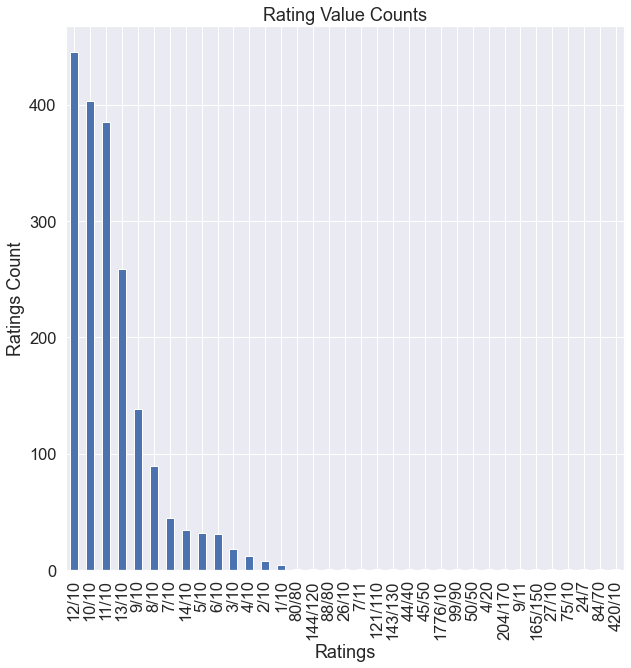

In [135]:
# Plotting ratings count with highest ratings
tweet_master['rating'].value_counts()[:35].plot(kind='bar' , figsize=(10,10),
                                       ylabel = 'Ratings Count', xlabel = 'Ratings',  
                                        title = "Rating Value Counts")
plt.savefig('Ratings_value_counts.png')

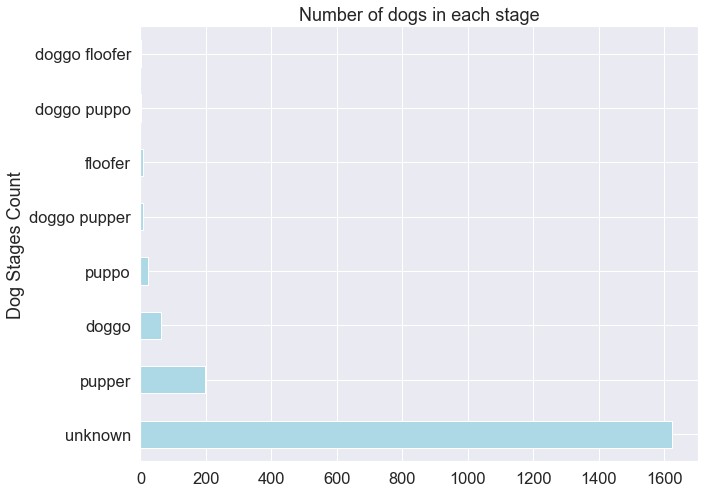

In [138]:
tweet_master['dog_stage'].value_counts()[:10].plot(kind='barh' , figsize=(10,8),
                                ylabel = 'Dog Stages ', xlabel = 'Dog Stages Count',  
                                                title =  "Number of dogs in each stage",
                                                  color = "lightblue")
plt.savefig('dog_stage_count_values.png')

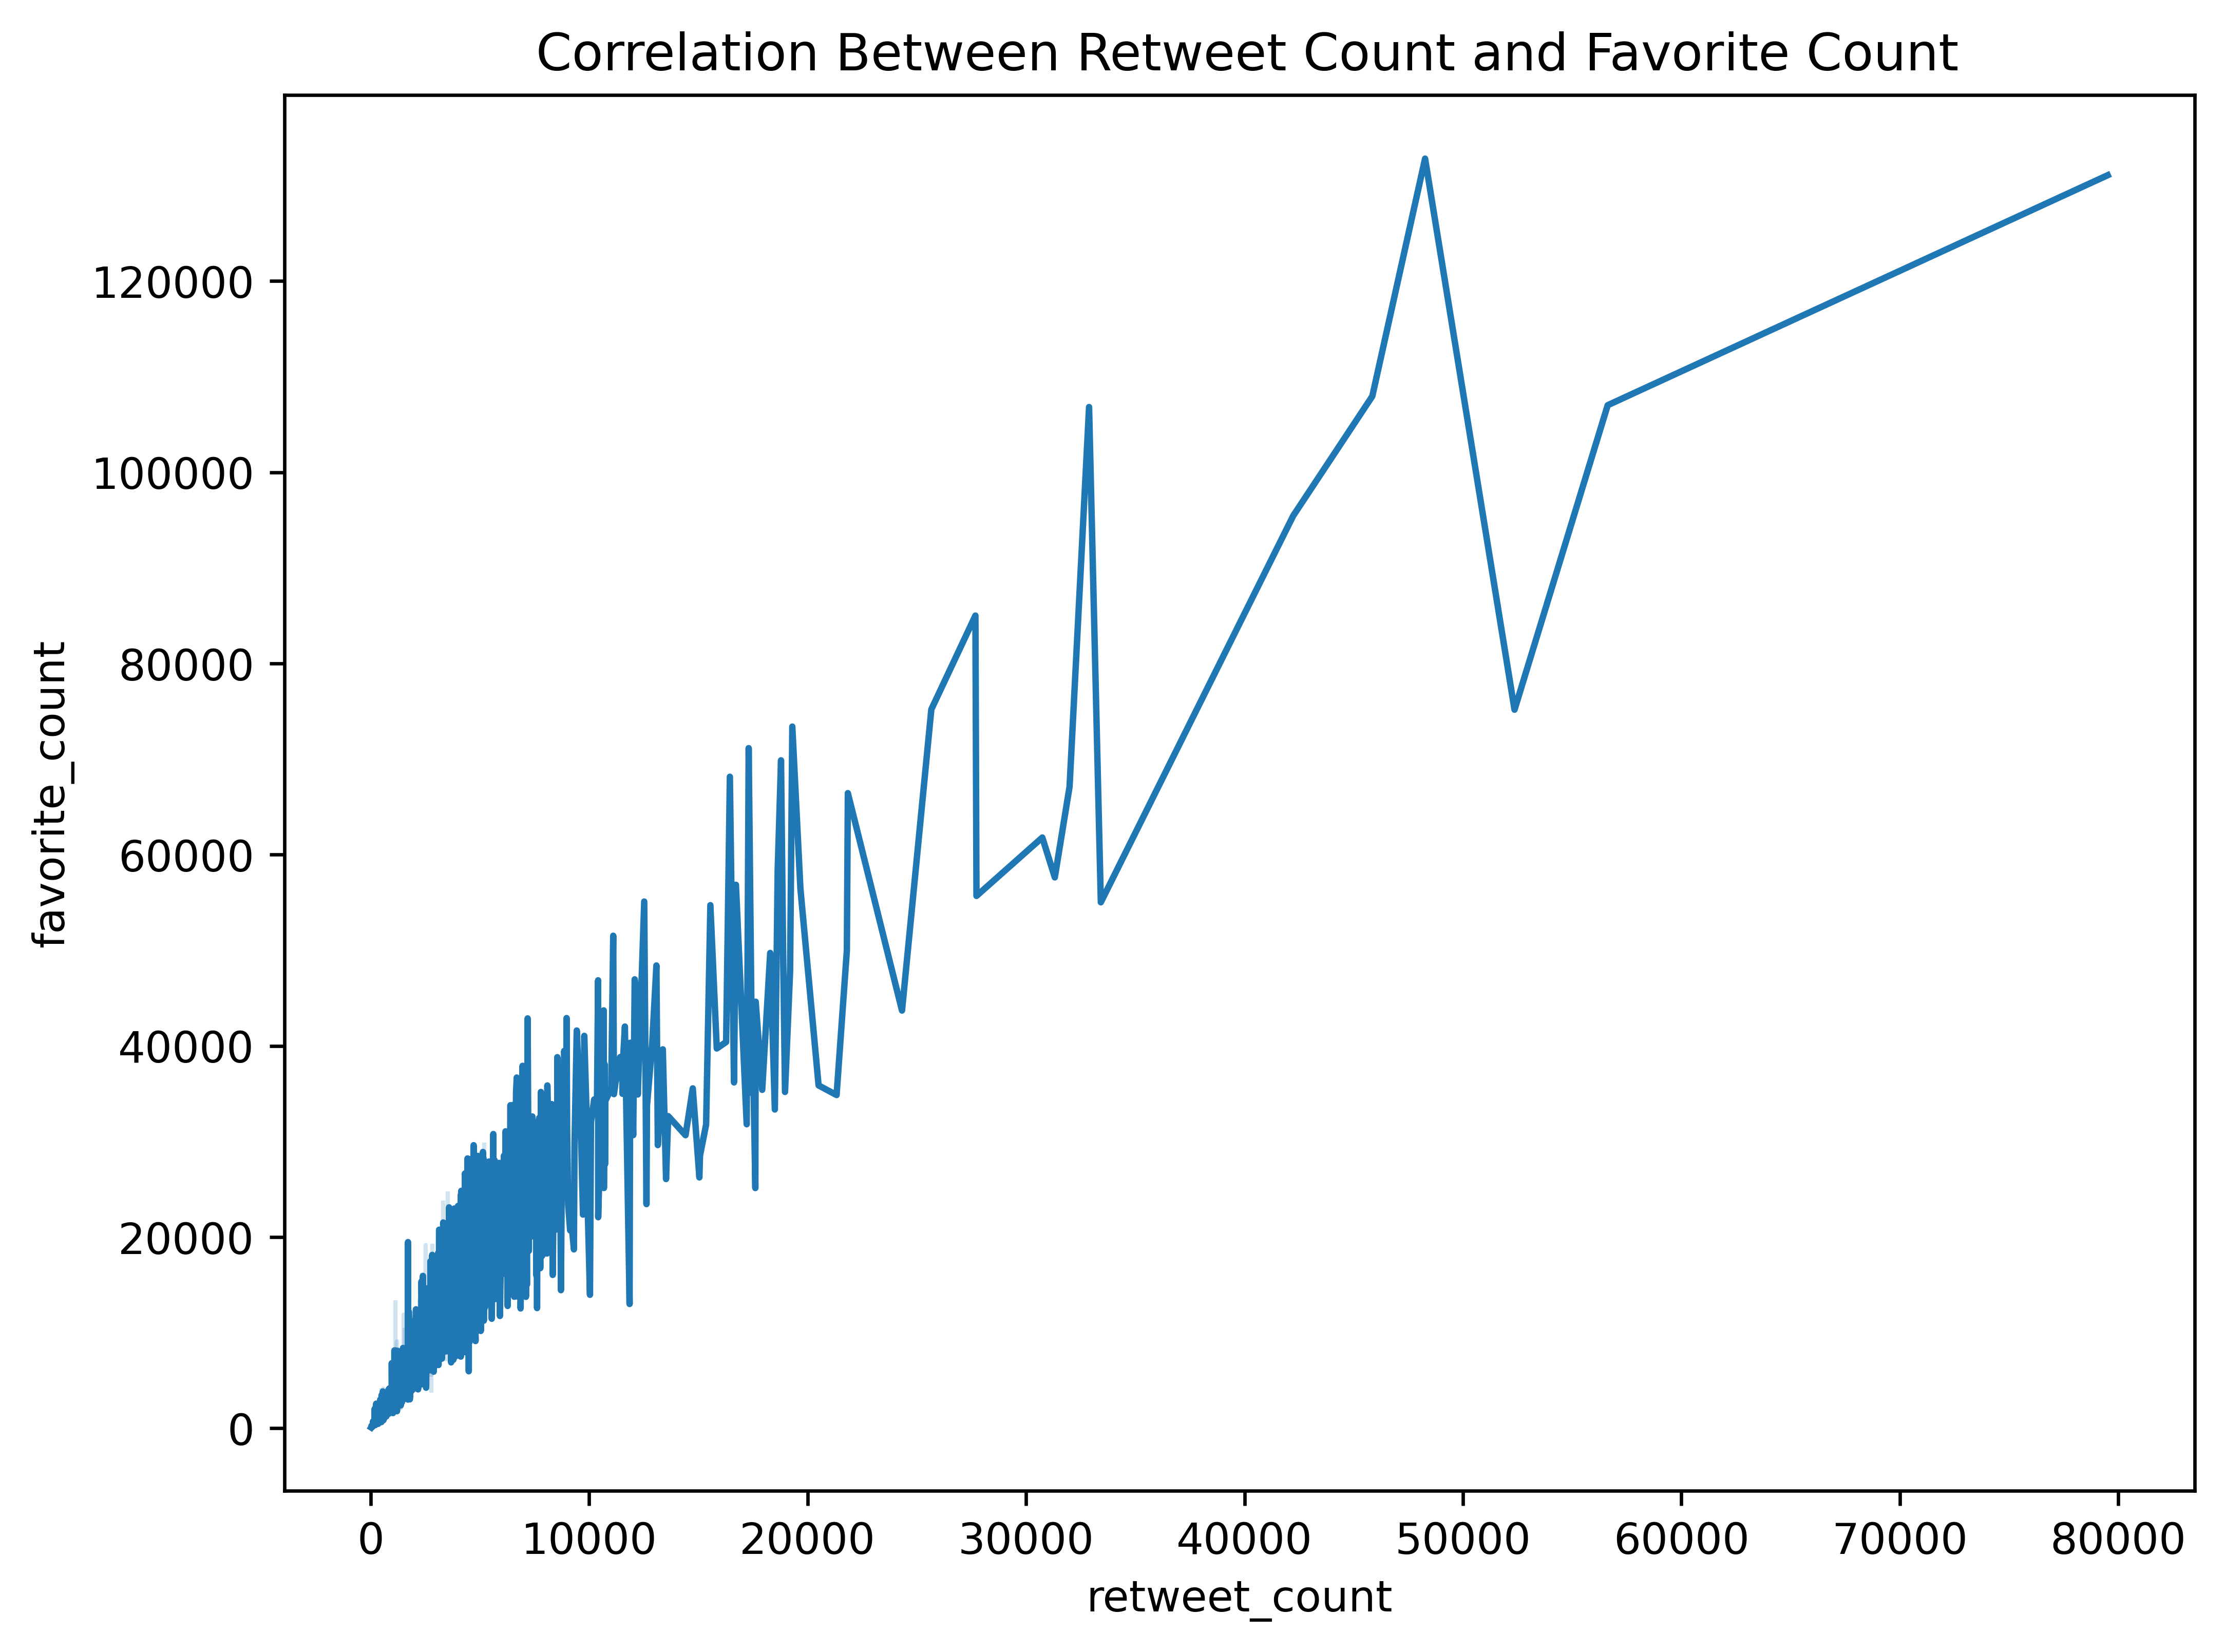

In [92]:
fig, ax = plt.subplots(figsize =(8,6), dpi =600)
chart = sns.lineplot(x= 'retweet_count', y = 'favorite_count', data =  tweet_master)
chart.set(title = ' Correlation Between Retweet Count and Favorite Count')
plt.show()
fig.savefig('correlation_Retweet_x_Favourite_count.png')

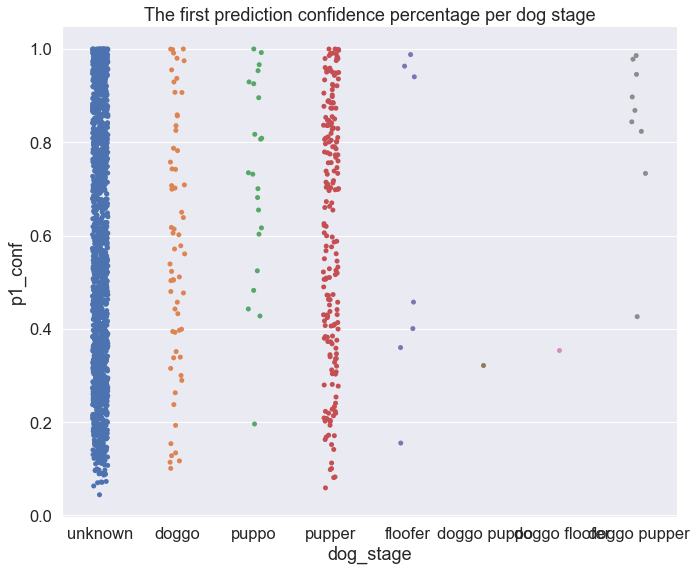

In [137]:
sns.catplot(x="dog_stage", y="p1_conf", kind="strip", data=tweet_master
            ,height=8, aspect=10/8)
plt.title("The first prediction confidence percentage per dog stage")
sns.set(font_scale = 1.5)
plt.savefig('1st_pred_per_dog_percentage.png')

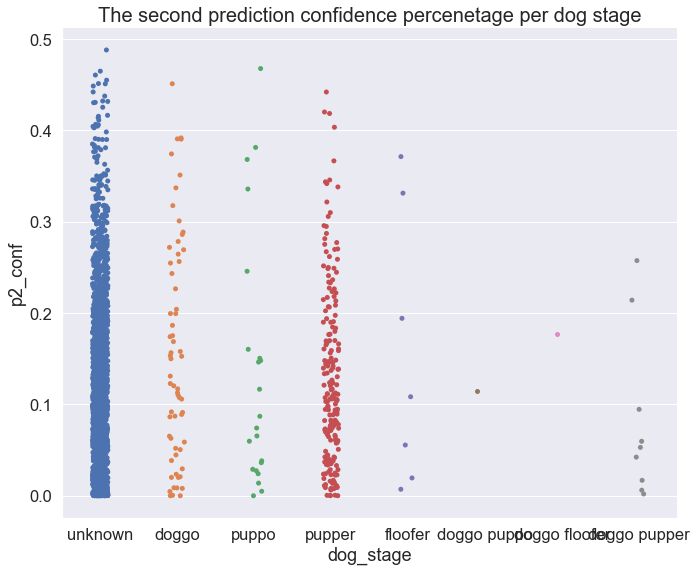

In [133]:
sns.catplot(x="dog_stage", y="p2_conf", kind="strip", data=tweet_master
            ,height=8, aspect=10/8) 
plt.title("The second prediction confidence percenetage per dog stage" , fontsize = 20)
plt.savefig('2nd_pred_per_dog_percentage.png')

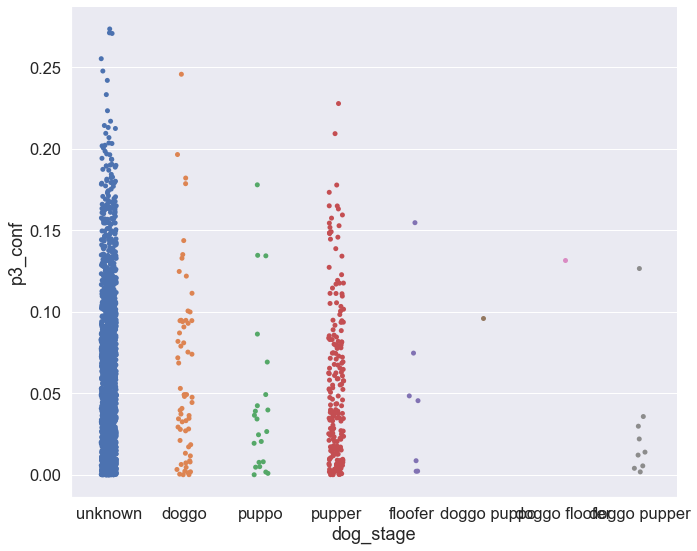

In [134]:
sns.catplot(x="dog_stage", y="p3_conf", kind="strip", data=tweet_master
            ,height=8, aspect=10/8) 
plt.savefig('3rd_pred_per_dog_percentage.png')

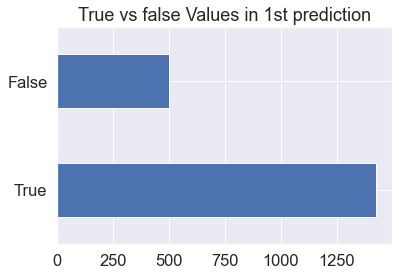

In [96]:
tweet_master.p1_dog.value_counts().plot(kind='barh' ,title= 'True vs false Values in 1st prediction')
plt.savefig('true_v_false_1st.png')

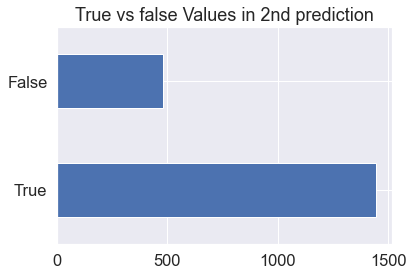

In [97]:
tweet_master.p2_dog.value_counts().plot(kind='barh' ,title= 'True vs false Values in 2nd prediction')
plt.savefig('true_v_false_2nd.png')

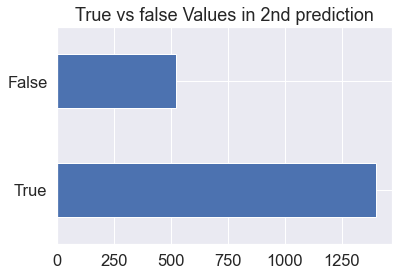

In [98]:
tweet_master.p3_dog.value_counts().plot(kind='barh' ,title= 'True vs false Values in 2nd prediction')
plt.savefig('true_v_false_3rd.png')

In [139]:
#correlation between rating and favorite count
fig, ax = plt.subplots(figsize =(30,30), dpi =600)
chart = sns.lineplot(x= 'rating', y = 'favorite_count',data =  tweet_master)
chart.set(title = ' Correlation Between Rating and Favorite Count')
sns.color_palette("bright")
sns.set(font_scale = 1.5)
plt.xticks(rotation =45 , fontsize= 20)
plt.yticks(fontsize = 20)
plt.show()
plt.savefig('correlation_rating_favorite.png')

<Figure size 432x288 with 0 Axes>

In [100]:
#Check percentage of no name values in names column
non_name_percentage = len(tweet_master.query('name == "No Name"'))/tweet_master.name.shape[0]*100
print(f"The percentage number of dogs with no names {non_name_percentage}%")

The percentage number of dogs with no names 28.274428274428274%


In [101]:
#check the percentage of unkwown dog stage names
unkwown_percentage = len(tweet_master.query('dog_stage == "unknown"'))/tweet_master.dog_stage.shape[0]*100
print(f"The percentage number of unknown dog stages is {unkwown_percentage}%")


The percentage number of unknown dog stages is 84.40748440748442%


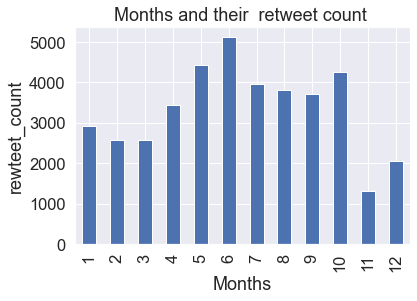

In [140]:
tweet_master.groupby(tweet_master["timestamp"].dt.month)["retweet_count"].mean().plot(
    kind='bar')


plt.title("Months and their  retweet count ")
plt.xlabel("Months");  # custom x label using matplotlib
plt.ylabel("rewteet_count")
plt.savefig('rewteet_count_in_Months.png')

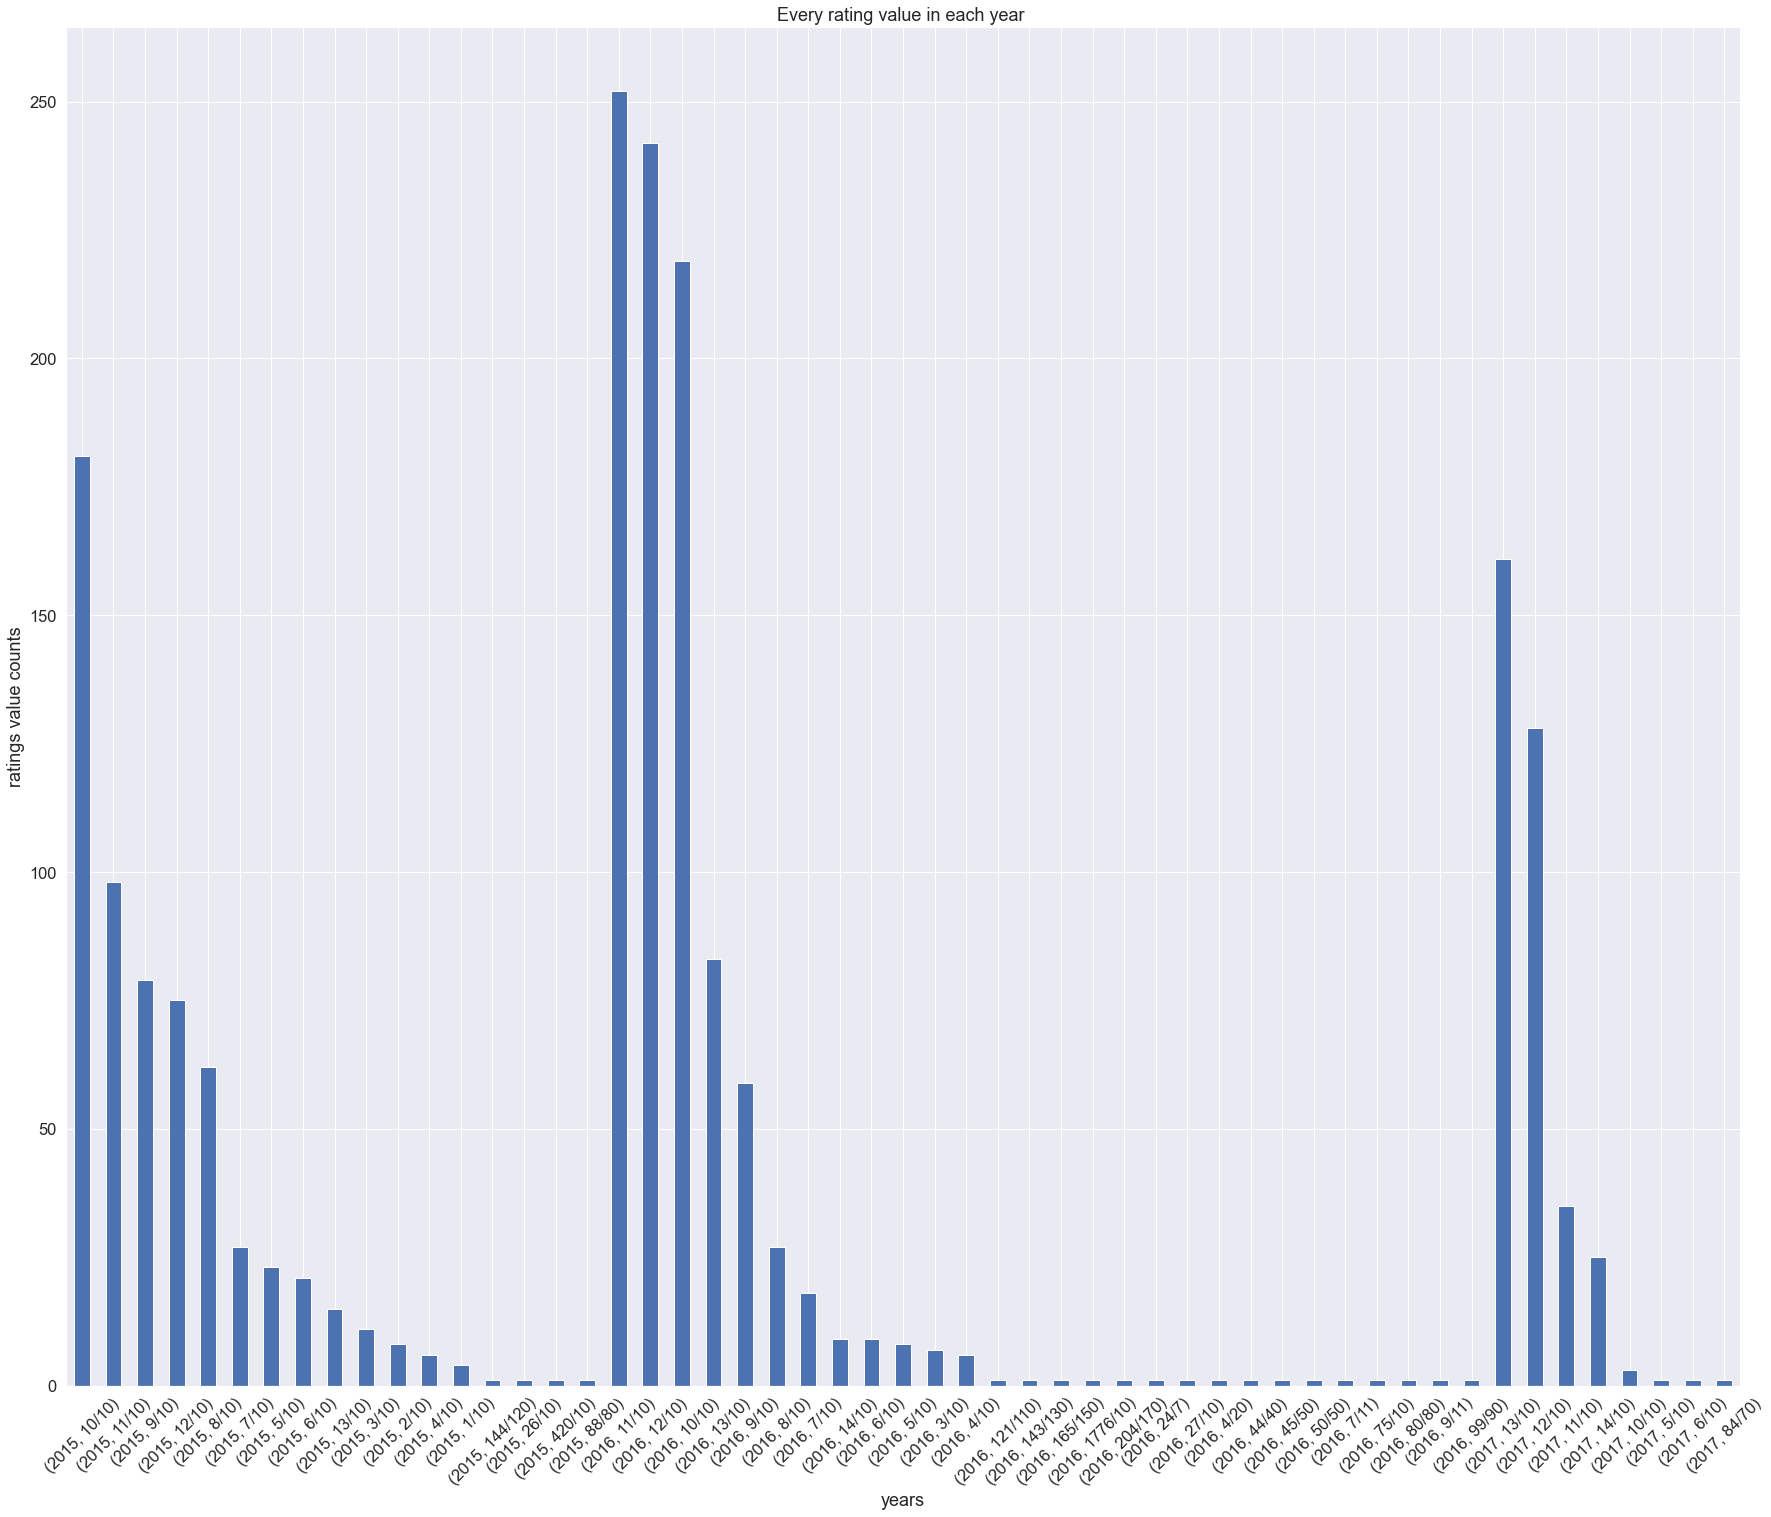

In [129]:
tweet_master.groupby(tweet_master["timestamp"].dt.year)["rating"].value_counts().plot(
    kind='bar',figsize= (30,25))
plt.title("Every rating value in each year ")
plt.xlabel("years");  # custom x label using matplotlib
plt.xticks(rotation = 45)
plt.ylabel("ratings value counts")
plt.savefig('Rating_count_by_Year.png')

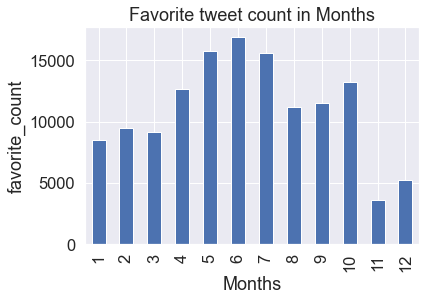

In [131]:
tweet_master.groupby(tweet_master["timestamp"].dt.month)["favorite_count"].mean().plot(
    kind='bar')

plt.title("Favorite tweet count in Months")
plt.xlabel("Months");  # custom x label using matplotlib
plt.ylabel("favorite_count")
plt.savefig('favorite_tweet_count_in_months.png')